# Proyek Klasifikasi Gambar: Vehicle Cllasification
- **Nama:** BAGAS DWI SANTOSA
- **Email:** bagasdwisantosa87@gmail.com
- **ID Dicoding:** [Input Username]

## Install Libraries

In [1]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.16.0
    Uninstalling tf_keras-2.16.0:
      Successfully uninstalled tf_keras-2.16.0


In [2]:
!pip install --upgrade tensorflow==2.16.2

  Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (590.6 MB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.1
    Uninstalling tensorflow-2.15.1:
      Successfully uninstalled tensorflow-2.15.1
ERROR: pip's dependency resolver does not currently 

In [3]:
!pip install tensorflow_decision_forests==1.8.0

  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2


## Import Library

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras import layers, models
import tensorflowjs as tfjs

In [5]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.1


## Connect to Drive

In [6]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Split Data Train & Test

In [7]:
data_directory = '/content/drive/MyDrive/dataset/Vehicle'
destination_directory = '/content/drive/MyDrive/dataset/Vehicle_Split'

In [8]:
def split_data_train_test(data_dir, destination_dir, split_ratio=0.8):
    train_dir = os.path.join(destination_dir, 'train')
    test_dir = os.path.join(destination_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    categories = os.listdir(data_dir)

    for category in categories:
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        category_path = os.path.join(data_dir, category)
        files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

        train_files, test_files = train_test_split(files, train_size=split_ratio, random_state=42)

        for file in train_files:
            shutil.copy(os.path.join(category_path, file), os.path.join(train_dir, category, file))

        for file in test_files:
            shutil.copy(os.path.join(category_path, file), os.path.join(test_dir, category, file))

In [9]:
split_data_train_test(data_directory, destination_directory, split_ratio=0.8)

In [10]:
train_directory = '/content/drive/MyDrive/dataset/Vehicle_Split/train'
test_directory = '/content/drive/MyDrive/dataset/Vehicle_Split/test'

## Load Data & Normalization Data

In [11]:
def load_data_img(train_dir, test_dir, img_height=150, img_width=150, batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255
    )

    test_datagen = ImageDataGenerator(
        rescale=1./255
    )

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return test_gen, test_gen

In [12]:
train_generator, test_generator = load_data_img(train_directory, test_directory)

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [13]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 150, 150, 3)
(32, 3)


In [14]:
for image_batch, labels_batch in test_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 150, 150, 3)
(32, 3)


## Visualization Images

In [15]:
def plot_images(generator, title):
    plt.figure(figsize=(12, 4))
    class_names = generator.class_indices
    class_names = {v: k for k, v in class_names.items()}
    for i in range(5):
        image, label = next(generator)
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(image[0])
        plt.title(class_names[np.argmax(label[0])])
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()

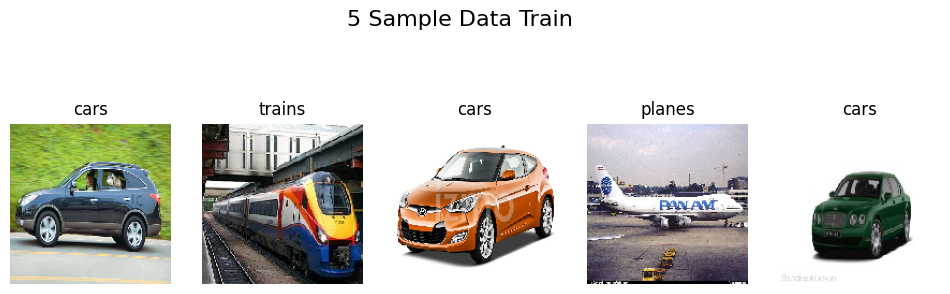

In [16]:
plot_images(train_generator, "5 Sample Data Train")

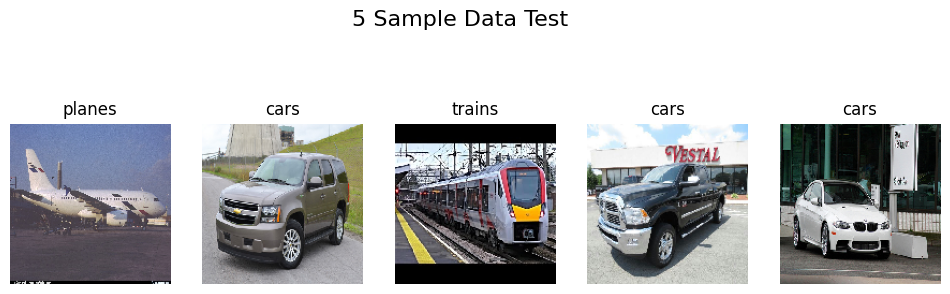

In [17]:
plot_images(test_generator, "5 Sample Data Test")

## Build Model

In [18]:
img_height = 150
img_width = 150
num_classes = len(train_generator.class_indices)

In [19]:
def cnn_model(img_height, img_width, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


## Compile Model

In [20]:
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

In [21]:
model = cnn_model(img_height, img_width, num_classes)
compile_model(model)

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Create Callbacks

In [23]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
            print("\nStop Training, Accuracy is OK!!!")
            self.model.stop_training = True

## Train Model

In [24]:
def train_model(model, train_generator, validation_generator, epochs=30):
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        callbacks=Callback()
    )
    return history

In [25]:
history = train_model(model, train_generator, test_generator, epochs=30)

Epoch 1/30
8/8 [==============================] - 9s 672ms/step - loss: 1.1854 - accuracy: 0.3417 - val_loss: 1.0555 - val_accuracy: 0.5125
Epoch 2/30
8/8 [==============================] - 4s 524ms/step - loss: 1.0239 - accuracy: 0.4958 - val_loss: 0.8835 - val_accuracy: 0.6667
Epoch 3/30
8/8 [==============================] - 4s 543ms/step - loss: 0.7888 - accuracy: 0.6083 - val_loss: 0.6852 - val_accuracy: 0.6792
Epoch 4/30
8/8 [==============================] - 5s 620ms/step - loss: 0.7062 - accuracy: 0.6417 - val_loss: 0.6682 - val_accuracy: 0.6375
Epoch 5/30
8/8 [==============================] - 4s 525ms/step - loss: 0.5873 - accuracy: 0.6958 - val_loss: 0.4931 - val_accuracy: 0.7833
Epoch 6/30
8/8 [==============================] - 5s 589ms/step - loss: 0.5826 - accuracy: 0.7042 - val_loss: 0.6623 - val_accuracy: 0.6375
Epoch 7/30
8/8 [==============================] - 4s 568ms/step - loss: 0.5636 - accuracy: 0.6792 - val_loss: 0.3744 - val_accuracy: 0.8500
Epoch 8/30
8/8 [====

## Visualization Accuracy & Loss

In [26]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

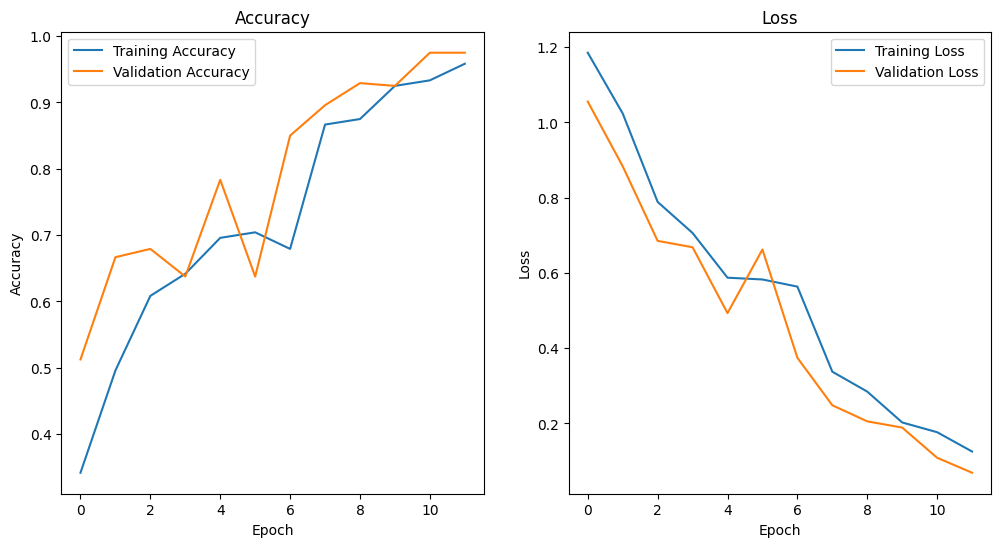

In [27]:
plot_training_history(history)

## Save Model

### SavedModel

In [28]:
model.save('/content/drive/MyDrive/dataset/Vehicle_Split/my_model')

### TfLite

In [29]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/dataset/Vehicle_Split/my_model')
tflite_model = converter.convert()

with open('/content/drive/MyDrive/dataset/Vehicle_Split/my_model.tflite', 'wb') as f:
    f.write(tflite_model)

### Tfjs

In [30]:
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/dataset/Vehicle_Split/my_model_tfjs')

## Inference Model

In [31]:
from tensorflow.keras.preprocessing import image

In [32]:
image_path = '/content/drive/MyDrive/dataset/Vehicle_Split/innovra_reborn.jpg'
img = image.load_img(image_path, target_size=(150, 150))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0

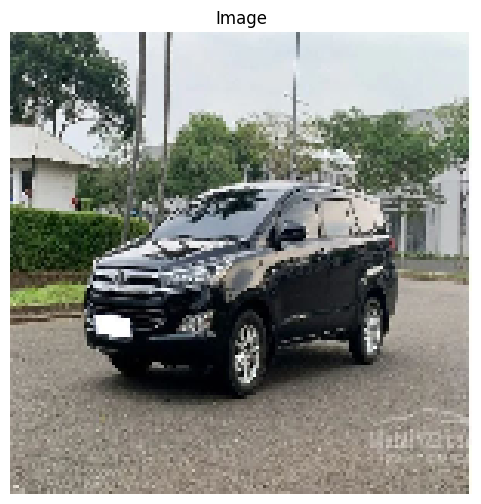

In [38]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Image')
plt.show()

In [34]:
predictions = model.predict(image_array)

1/1 [==============================] - 0s 481ms/step


In [37]:
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}
predicted_index = np.argmax(predictions, axis=-1)[0]
predicted_class = class_names[predicted_index]
print(f'Predicted class: {predicted_class}')

Predicted class: cars
